c:\users\student\appdata\local\programs\python\python36\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


[2, 3, 2, 3, 2, 3, 2, 3, 2, 3]


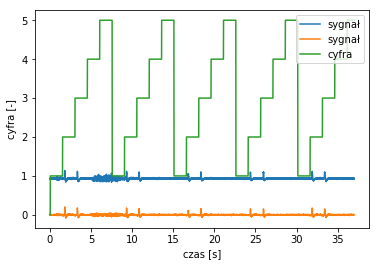

In [4]:
import aseegg as ag
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('sub1trial8.csv', delimiter=',', engine='python', names=['-','kanal1', 'kanal2', 'kanal3', 'kanal4','cyfra' ])
fs=200
data1=data['kanal1']
data4=data['cyfra']
t = int(len(data1)/fs)
#linspace(first number, last number, how many numbers in array)
x =np.linspace(0,t,t*fs)
#prefiltered
plt.plot(x,data1[0:t*fs],label ='sygnał')
plt.ylabel('mikrowolty [mV]')
plt.xlabel('czas [s]')
plt.legend(loc='upper right')
#plt.show()
#filtered
filtr1 = ag.pasmowozaporowy(data1, fs, 49, 51)
filtr2= ag.pasmowoprzepustowy(filtr1, fs, 1, 50)
plt.plot(x,filtr2[0:t*fs], label ='sygnał')
plt.ylabel('mikrowolty [mV]')
plt.xlabel('czas [s]')
plt.legend(loc='upper right')
#plt.show()
plt.plot(x,data4[0:t*fs])
plt.ylabel('cyfra [-]')
plt.xlabel('czas [s]')
plt.legend(loc='upper right')
#plt.show()
#decoded(print())
#przefiltrowany sygnal, mrugnięcia to wzniesienie na y, wzniesienie czyli wartość y większą od Q, ale w przedziale od Q do Q, do każdej wartości dopasowana jest cyfra, dodać tę cyfrę do arraya

#Q = 0.12 wyczytane z
licznik=0
z = 0
mrugane = []
for i in filtr2:
    if i>=0.10 and z<0.10:
        mrugane.append(data['cyfra'][licznik])
    z=i
    licznik+=1
print(mrugane)